In [6]:
from sklearn import datasets

In [7]:
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [8]:
import pandas as pd
import numpy as np

In [9]:
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)

In [11]:
print(df.shape)
print(df)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3.2705      52.0  4.77

In [12]:
y = calihouses.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [20]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [21]:
predictions = lm.predict(X_test)
print(predictions)

[0.55522765 2.54064695 0.39042327 ... 3.41784243 2.99781587 2.68346857]


In [22]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

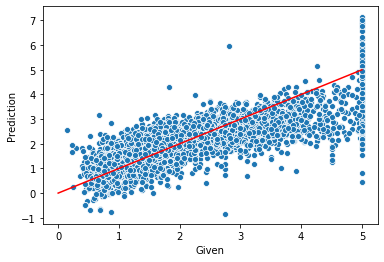

In [23]:
plot = sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [24]:
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)
print(ho_score)

-0.4977739621750992


In [26]:
X = np.array(df)

In [28]:
from sklearn.model_selection import cross_val_predict
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv=10)
print(k_predictions)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


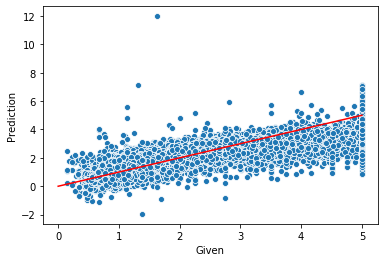

In [30]:
plot_k = sns.scatterplot(y, k_predictions)
plot_k.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [31]:
from sklearn.model_selection import cross_val_score
kfold_scores = cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())

-0.550952429695666


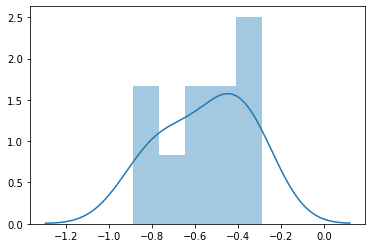

In [32]:
sns.distplot(kfold_scores, bins=5)

In [34]:
LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))

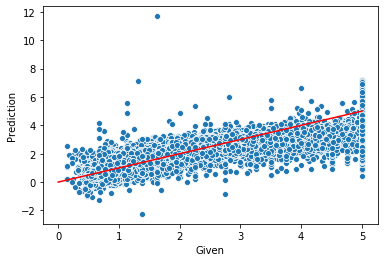

In [35]:
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [61]:
LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)), scoring='neg_mean_squared_error').mean()
print(LOO_score)

-0.5282462043712454


In [63]:
from sklearn.externals import joblib
joblib.dump(lm,'Project21_California_housing.pkl')

['Project21_California_housing.pkl']